In [1]:
import pandas as pd
import seaborn as sns
from utils import *

In [2]:
df = pd.read_csv('data/crypto_1m.csv', index_col='unix')
df = df[-60*24*2:-60*24*1] # pick highest cointegrated pairs from t-24 hours

<AxesSubplot:>

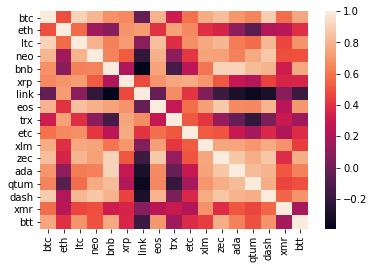

In [3]:
corr = df.corr()
sns.heatmap(corr)

In [4]:
n = corr.shape[0]
total_pairs = n**2 - n
total_pairs

272

In [5]:
def get_top_n_corr(corr, n):
    return corr.unstack().sort_values(ascending=False)[corr.shape[0]:corr.shape[0]+n*2][::2]
top_corr = get_top_n_corr(corr, 100)
top_corr

ada  bnb     0.910302
bnb  zec     0.908293
btc  ltc     0.908075
     dash    0.884487
eos  zec     0.873636
               ...   
btt  xrp     0.358421
xmr  xrp     0.351506
eth  zec     0.350773
btc  trx     0.312370
bnb  xmr     0.311738
Length: 100, dtype: float64

In [6]:
p_values = []
for i, j in list(top_corr.axes[0]):
    pair = i + ' ' + j
    b1, b0, adf_p = fit_model(df[i], df[j])
    p_values.append({'pair':pair, 'p_value':adf_p})

In [7]:
pd.DataFrame(p_values).sort_values(by='p_value')

,pair,p_value
46,eth xrp,0.000253
2,btc ltc,0.000446
27,dash xlm,0.000615
54,eth etc,0.000833
87,link etc,0.001035
...,...,...
58,btc qtum,0.624239
23,qtum dash,0.704077
90,xlm eth,0.708785
84,xlm btt,0.903599


In [8]:
# Note: Orders matter slightly !
b1, b0, adf_p = fit_model(df['eth'], df['btc'])
print(adf_p)

0.0034806468521588222
